# Loading Geospatial Data

<style> p { text-align: justify; } </style>

When working with geospatial data in Python, one of the first steps is to load your data into a usable format. For this tutorial, we will focus on GeoPackage (gpkg) files for vector data and GeoTIFF (tif) files for raster data. These formats are widely used in geospatial analysis due to their flexibility and efficiency. Let’s explore how to load and visualize both types of data.

## Loading and Visualizing Vector Data

Vector data, stored in formats like GeoPackage, represents geographic features as points, lines, or polygons. Each feature comes with associated attributes, such as the name of a location or the length of a road.

To handle vector data in Python, we’ll use the `GeoPandas` library. GeoPandas makes it easy to load vector data into a structure called a GeoDataFrame, which is similar to a Pandas DataFrame but includes spatial features. Loading a GeoPackage file is straightforward: you simply specify the file path and layer name. Once loaded, you can inspect your data, filter specific features, or visualize it directly.

In [1]:
# Import geopandas library
import geopandas as gpd 

# Load a geopackage file
vector_data = gpd.read_file("data/vector/kanchanpur.gpkg")

# View the first few rows
print(vector_data.head())

           NAME                                           geometry
0  BaisiBichawa  MULTIPOLYGON (((80.49934 28.64667, 80.49709 28...
1      Beldandi  MULTIPOLYGON (((80.25229 28.75782, 80.25377 28...
2      Chandani  MULTIPOLYGON (((80.10973 28.98432, 80.10986 28...
3        Daijee  MULTIPOLYGON (((80.34424 29.05416, 80.34449 29...
4   Dekhatbhuli  MULTIPOLYGON (((80.44701 28.78921, 80.43608 28...


For visualization, GeoPandas integrates seamlessly with Matplotlib, enabling you to plot features on a map. For instance, you can display the boundaries of polygons or the paths of line features with just a few commands. You can also style the visualization, for example, by coloring polygons based on an attribute like population density.

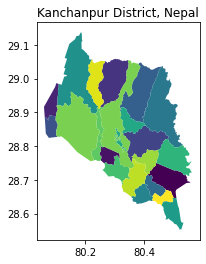

In [4]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Plot vector data
vector_data.plot(column='NAME', cmap='viridis', legend=False)
plt.title("Kanchanpur District, Nepal")
plt.show()


## Loading and Visualizing Raster Data

Raster data, often stored as GeoTIFF files, represents the Earth as a grid of cells (or pixels), where each cell holds a value such as elevation or temperature. Unlike vector data, raster data is continuous and is commonly used for tasks like analyzing satellite imagery or modeling terrain.

To work with raster data in Python, we’ll use the `rasterio` library. Rasterio allows you to read GeoTIFF files and access both the pixel values and metadata, such as the spatial resolution and coordinate reference system (CRS). When you load a raster file, the pixel values can be extracted as an array, which can then be processed or visualized.

In [5]:
# Import rasterio library
import rasterio

# Load a raster file
raster_data = rasterio.open("data/raster/landcover_2015.tif")

# Print raster metadata
print(raster_data.meta)

{'driver': 'GTiff', 'dtype': 'uint32', 'nodata': 4294967295.0, 'width': 505, 'height': 590, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.0009920634920634916, 0.0, 80.06051587301587,
       0.0, -0.0009920634920634892, 29.136904761904802)}


For visualization, libraries like `Matplotlib` and `rasterio.plot` can be used to display raster data as images. You can apply color maps to represent different pixel values or overlay the raster data on a map for context. This is especially useful for visualizing features like vegetation indices or elevation gradients.

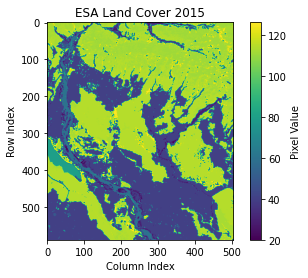

In [ ]:
# Import required libraries
import rasterio
import matplotlib.pyplot as plt

# Load the raster data
raster_file = "data/raster/landcover_2015.tif"

with rasterio.open(raster_file) as src:
    raster_data = src.read(1)  # Read the first band (common for single-band rasters)
    
    # Plot the raster using Matplotlib
    plt.imshow(raster_data, cmap='viridis')
    plt.colorbar(label="Pixel Value")  # Add a colorbar to indicate pixel values
    plt.title("ESA Land Cover 2015")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()


In this tutorial, we’ve introduced how to load and visualize geospatial data using GeoPandas for vector data and rasterio for raster data. These libraries provide powerful tools for geospatial analysis, and understanding how to load and inspect your data is the first step in any analysis workflow. In the next sections, we’ll dive deeper into processing and analyzing this data to extract meaningful insights.